# numeri quasi casuali

L'ottimizzazione dell'integrazione numerica con il metodo Monte Carlo si ottiene, fra le altre cose, con una scelta oculata delle coordinate $x$ dei punti generati casualmente.
Infatti, pi\`u essi ricoprono in maniera ottimale l'insieme di definizione della funzione da integrare, migliore \`e la precisione ottenuta nella sua stima, a parit\`a di punti generati.
La sequenza $s_n$ generata secondo il seguente algoritmo:
\begin{align}
\label{eq:sequenza}
s_{n+1} &= (s_{n} + \alpha)~\textrm{mod}~1
\end{align}
produce un insieme di punti, distribuiti fra $0$ ed $1$, che hanno la propriet\`a di ben riempire questo insieme di definizione, in particolare se $\alpha = (\sqrt{5} - 1) / 2$.

 * Si scriva una libreria che contenga una classe di python, chiamata ```additive_recurrence```, che generi la sequenza di numeri $S_n$ che abbia come variabili membro il parametro $\alpha$, il numero di partenza della sequenza e l'ultimo numero generato, che inizializzi $\alpha$ durante l'inizializzazione ed implementi i metodi seguenti:
   * ```get_number``` per ottenere un numero della sequenza
   * ```set_seed``` per inizializzare la sequenza
 * Si faccia un test del funzionamento della classe generando una sequenza di $1000$ numeri e scrivendone i primi 10 a schermo.

In [1]:
from lib import additive_recurrence as ar

gen_seq = ar ()
my_seq = []
for i in range (1000) : my_seq.append (gen_seq.get_number ())
for i in range (10) : print (my_seq[i], ' ', end = '')
print ()

0.11803399999999997  0.736068  0.3541019999999999  0.9721359999999999  0.5901699999999999  0.20820399999999983  0.8262379999999998  0.4442719999999998  0.06230599999999975  0.6803399999999997  


(array([41., 43., 42., 41., 42., 41., 41., 42., 43., 40., 43., 41., 42.,
        41., 42., 41., 42., 43., 41., 42., 41., 42., 41., 42.]),
 array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ]),
 <BarContainer object of 24 artists>)

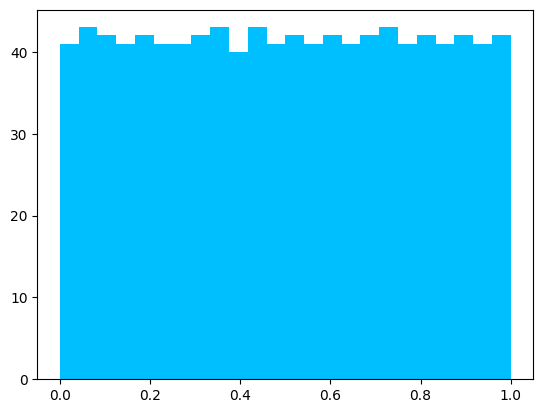

In [2]:
from lib import sturges
import numpy as np
import matplotlib.pyplot as plt

N_bins = sturges (len (my_seq))
# build a numpy histogram containing the data counts in each bin
bin_content, bin_edges = np.histogram (my_seq, bins = N_bins, range = (0, 1))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (my_seq,
         bins = bin_edges,
         color = 'deepskyblue',
        )

 * Si scriva una funzione chiamata `MC_mod` che calcoli l'integrale di $f(x) = 2x^2$ nell'intervallo $(0,1)$, utilizzando il metodo \textit{crude Montecarlo} dove la generazione dei punti lungo l'asse $x$ non sia fatta in modo pseudo-casuale, ma utilizzando la classe `additive_recurrence`.
 * Utilizzando il metodo dei \textit{toy experiment}, si determini l'incertezza del calcolo dell'integrale in funzione del numero totale `N_points` di punti generati per un singolo integrale, disegnandone l'andamento dell'errore in funzione di `N_points` al variare fra $100$ e $25000$.

In [3]:
from lib import integral_CrudeMC
from statistics import mean, stdev
import numpy as np

N_toys = 1000
N_points = 10
N_points_max = 25000

seq_N = []
seq_sigma = []
seq_sigma_t = []
seq_mean = []

func = lambda x : 2 * x * x

while N_points < N_points_max :
    print ('running with', N_points, 'points')
    integrals = []
    for i_toy in range (N_toys): 
        x_axis = gen_seq.get_numbers (N_points)
        result = integral_CrudeMC (func, 0, 1, x_axis)
        integrals.append (result[0])
        if i_toy == 0 : seq_sigma.append (result[1])  
    seq_N.append (N_points)
    seq_sigma_t.append (stdev (integrals))
    seq_mean.append (mean (integrals))
    N_points *= 2
print ('DONE')

running with 10 points
running with 20 points
running with 40 points
running with 80 points
running with 160 points
running with 320 points
running with 640 points
running with 1280 points
running with 2560 points
running with 5120 points
running with 10240 points
running with 20480 points
DONE


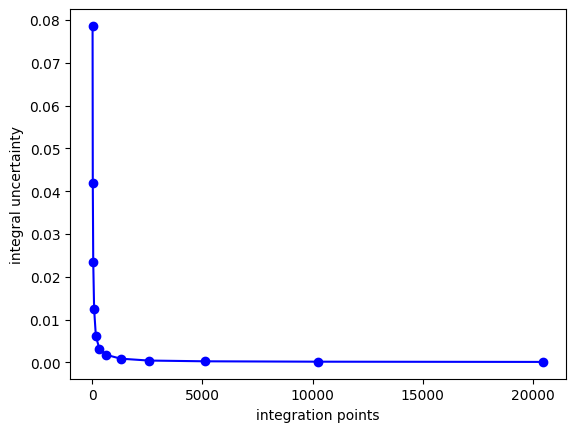

In [4]:
fig, ax = plt.subplots ()
ax.plot (seq_N, seq_sigma, 'bo-', label = 'estimate')
ax.plot (seq_N, seq_sigma_t, 'bo-', label = 'toys')
ax.set_xlabel ('integration points')
ax.set_xscale ('log')
ax.set_yscale ('log')
ax.set_ylabel ('integral uncertainty')
plt.show ()    

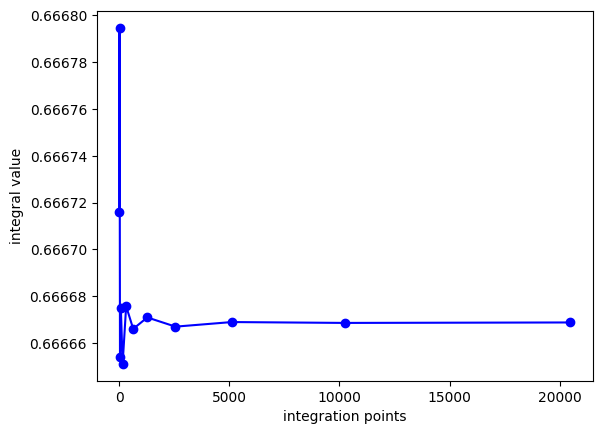

In [5]:
fig, ax = plt.subplots ()
ax.plot (seq_N, seq_mean, 'bo-')
ax.set_xlabel ('integration points')
ax.set_ylabel ('integral value')
plt.show ()    

 * Si rifaccia il medesimo test con l'algoritmo \textit{crude Montecarlo} studiato a lezione e si confrontino i due risultati: quale \`e pi\`u efficiente?

In [6]:
from lib import MC_classic, rand_range

N_points = 10
seq_sigma_cl = []
seq_sigma_cl_t = []
seq_mean_cl = []

while N_points < N_points_max :
    print ('running with', N_points, 'points')
    integrals = []

    for i_toy in range (N_toys): 
        x_axis = []
        for i in range (N_points): x_axis.append (rand_range (0., 1.))
        result = integral_CrudeMC (func, 0, 1, x_axis)
        integrals.append (result[0])
        if i_toy == 0 : seq_sigma_cl.append (result[1])  
    seq_sigma_cl_t.append (stdev (integrals))
    seq_mean_cl.append (mean (integrals))
    N_points *= 2
print ('DONE')

running with 10 points
running with 20 points
running with 40 points
running with 80 points
running with 160 points
running with 320 points
running with 640 points
running with 1280 points
running with 2560 points
running with 5120 points
running with 10240 points
running with 20480 points
DONE


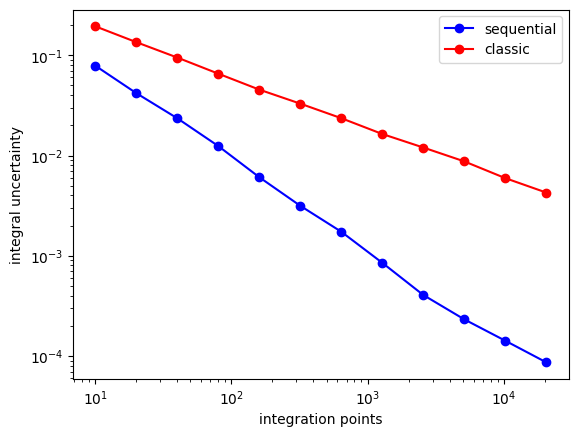

In [7]:
fig, ax = plt.subplots ()
ax.plot (seq_N, seq_sigma, 'bo-', color = label = 'sequential')
ax.plot (seq_N, seq_sigma_cl, 'ro-', color = label = 'classic')
ax.plot (seq_N, seq_sigma_t, 'bo-', color = 'red', label = 'sequential')
ax.plot (seq_N, seq_sigma_cl_t, 'ro-', color = 'blue', label = 'classic')
ax.set_xlabel ('integration points')
ax.set_ylabel ('integral uncertainty')
ax.set_xscale ('log')
ax.set_yscale ('log')
ax.legend ()
plt.show ()    

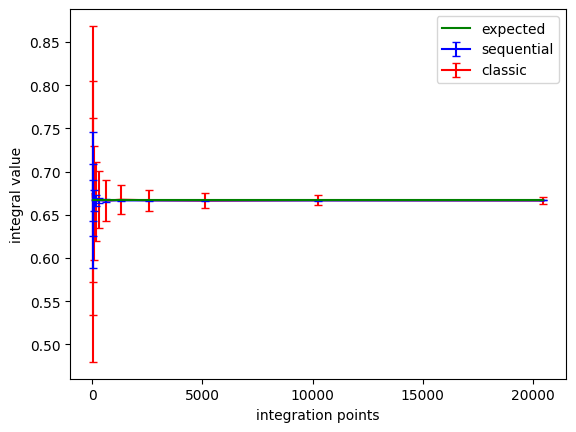

In [8]:
fig, ax = plt.subplots ()
# ax.plot (seq_N, seq_mean, 'bo-', label = 'sequential')
# ax.plot (seq_N, seq_mean_cl, 'ro-', label = 'classic')
# ax.errorbar (seq_N, seq_mean, seq_sigma, 'bo-', label = 'sequential')
# ax.errorbar (seq_N, seq_mean_cl, seq_sigma_cl, 'ro-', label = 'classic')
ax.errorbar (seq_N, seq_mean, seq_sigma, color = 'blue', capsize=3, label = 'sequential',zorder=5)
ax.errorbar (seq_N, seq_mean_cl, seq_sigma_cl, color = 'red', capsize=3, label = 'classic', zorder=0)
ax.plot (seq_N, [2./3. for i in seq_mean], 'g-', label = 'expected', zorder=10)
ax.set_xlabel ('integration points')
ax.set_ylabel ('integral value')
ax.legend ()
plt.show ()  